Facial Expression Recognition Coursework by Daniel Tiboah Addo

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score , confusion_matrix  , roc_curve
import matplotlib.pyplot as plt

from keras.optimizer_v2.adam import Adam
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA


K-Nearest Neighbour Classifier From Scratch - FIRST CLASSIFIER

In [170]:
class KnnClassification_Method:

    def __init__(self,num_neighbors): #knn is the number of nearest neighbors
        self.y_train = None
        self.x_train = None
        self.num_neighbors = num_neighbors

    def fit_KnnAlgorithm(self,x,y): #fit the knn algorithm
        self.x_train = x #training data
        self.y_train = y #training targets

    def predict_KnnAlgorithm(self,x_test:list) -> list: #X_test is the test data
        y_pred = [] #predicted labels

        for i in range(len(x_test)): #for each data point in test data

            #find the distance
            distances = [] #distances of each data point from the training data
            for j in range(len(self.x_train)): #for each data point in training data
                dist = np.linalg.norm(x_test[i]-self.x_train[j]) #euclidean distance
                distances.append(dist) #append the distance to the list

            #find the k nearest neighbors
            nearest_neighbors = np.argsort(distances)[:self.num_neighbors] #find the k nearest neighbors

            #find the most common class
            class_count = {} #count of each class

            for i in nearest_neighbors: #for each nearest neighbor
                response = self.y_train[i] # get the class of the nearest neighbor
                if response in class_count: # if the class is already in the dictionary
                    class_count[response] += 1 #increment the count
                else: #if the class is not in the dictionary
                    class_count[response] = 1 #set the count to 1

            #find the class with the highest count
            max_class = max(class_count,key=class_count.get) #get the class with the highest count
            y_pred.append(max_class) #append the class to the list of predicted labels
        return y_pred #return the list of predicted labels

    def evaluate_KnnAlgorithm(self,y_test,y_pred): #evaluate the knn algorithm
        accuracy = accuracy_score(y_test,y_pred) #calculate the accuracy
        return accuracy #return the accuracy

Convolutional Neural Network Classifier From Scratch - SECOND CLASSIFIER

Confusion Matrix function

In [171]:
def plot_CM(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    plt.matshow(cm)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cm

In [172]:
def pca(X_train,X_test):
    pca = PCA(n_components=10)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca,X_test_pca

Load Grammactical Facial Expressions Dataset

In [173]:
chosen_expressions = ['relative','negative']

def examine_expression(expression,person):
    expression = int(expression)
    x =  np.loadtxt('grammatical_facial_expression/'+person+'_'+chosen_expressions[expression]+'_datapoints.txt',skiprows=1) #load the data
    y =  np.loadtxt('grammatical_facial_expression/'+person+'_'+chosen_expressions[expression]+'_targets.txt') #load the targets
    return x[:,1:],y

Load in Relative and Negative Expressions

In [174]:
#load data
relative_x,relative_y = examine_expression(0,'a') #relative for user A
negative_x,negative_y = examine_expression(1,'a') #negative for user A

def standardize(xdata):
    sts = StandardScaler()
    xdata = sts.fit_transform(xdata)
    return xdata

relative_x = standardize(relative_x)
negative_x = standardize(negative_x)

EDA of both expressions

Standardize the Data

C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


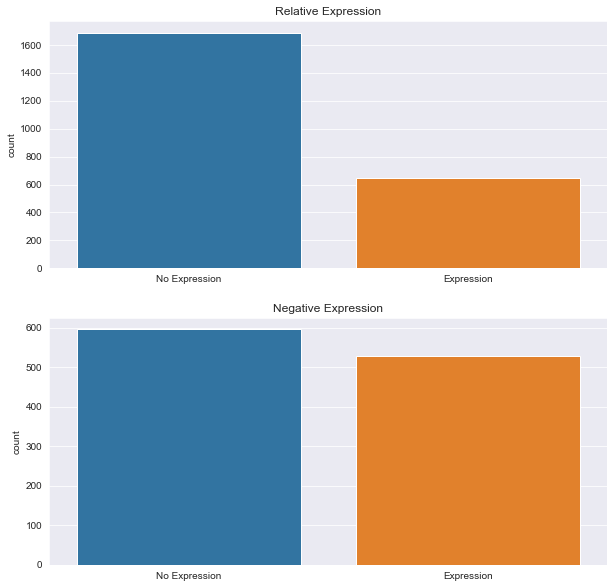

In [175]:
#plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(relative_y)
plt.title('Relative Expression')
set0 = "No Expression"
set1 = "Expression"
plt.xticks([0,1], [set0,set1])
plt.subplot(2,1,2)
sns.countplot(negative_y)
plt.title('Negative Expression')
plt.xticks([0,1], [set0,set1])
plt.show()

Train on expression from User A

In [176]:
kf = KFold(n_splits=10,shuffle=True,random_state=42)
kf.get_n_splits(relative_x)
UserA_R_KnnModel = KnnClassification_Method(3)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


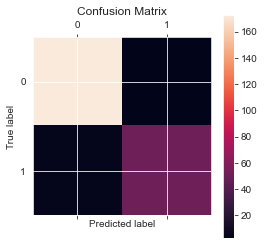

[[173   3]
 [  5  52]]
Accuracy:  0.9656652360515021
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


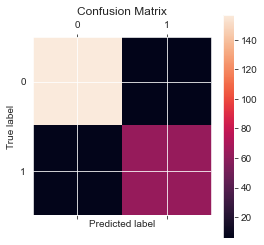

[[157   6]
 [  7  63]]
Accuracy:  0.944206008583691
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


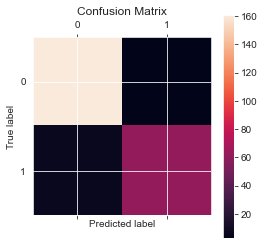

[[161   3]
 [  7  62]]
Accuracy:  0.9570815450643777
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


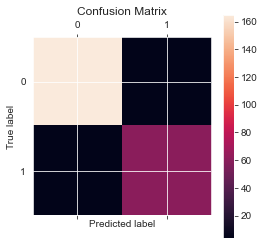

[[165   4]
 [  4  60]]
Accuracy:  0.9656652360515021
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


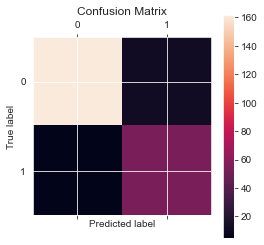

[[162  12]
 [  5  54]]
Accuracy:  0.927038626609442
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


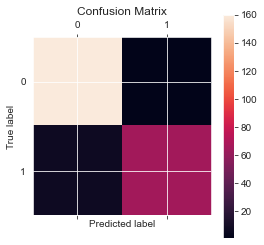

[[160   1]
 [  7  65]]
Accuracy:  0.9656652360515021
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


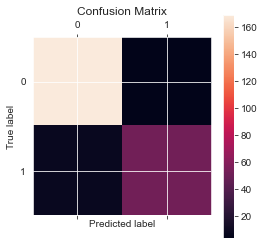

[[169   4]
 [  8  52]]
Accuracy:  0.9484978540772532
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


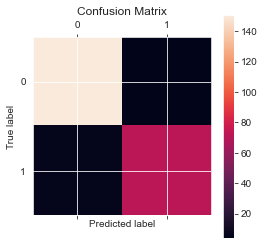

[[151   4]
 [  6  72]]
Accuracy:  0.9570815450643777
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


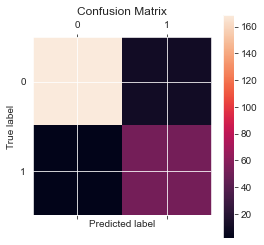

[[169  10]
 [  2  52]]
Accuracy:  0.9484978540772532
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


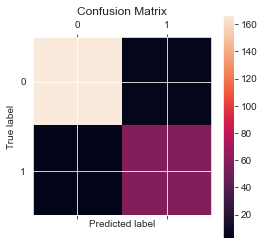

[[167   5]
 [  3  58]]
Accuracy:  0.9656652360515021
Average Accuracy:  0.9545064377682403
Max Accuracy:  0.9656652360515021


In [177]:

Rmax_acc= []
for train_index,test_index in kf.split(relative_x,relative_y):
    relative_x_train,relative_x_test = relative_x[train_index],relative_x[test_index]
    relative_y_train,relative_y_test = relative_y[train_index],relative_y[test_index]
    UserA_R_KnnModel.fit_KnnAlgorithm(relative_x_train,relative_y_train)
    pred_relativeK_A = UserA_R_KnnModel.predict_KnnAlgorithm(relative_x_test)
    acc = accuracy_score(relative_y_test,pred_relativeK_A)
    print("Confusion Matrix")
    print(plot_CM(relative_y_test,pred_relativeK_A))
    print("Accuracy: ",acc)
    Rmax_acc.append(acc)


print("Average Accuracy: ",np.mean(Rmax_acc))
print("Max Accuracy: ",max(Rmax_acc))

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


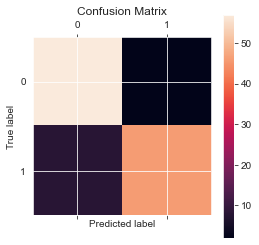

[[57  2]
 [ 8 46]]
Accuracy:  0.911504424778761
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


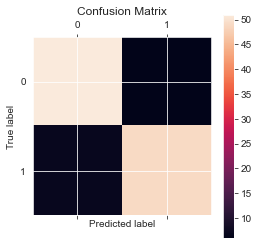

[[51  6]
 [ 7 49]]
Accuracy:  0.8849557522123894
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


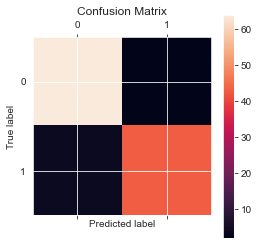

[[64  2]
 [ 4 43]]
Accuracy:  0.9469026548672567
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


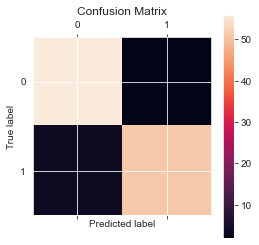

[[56  2]
 [ 4 51]]
Accuracy:  0.9469026548672567
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


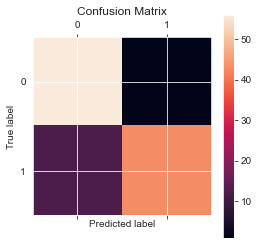

[[56  1]
 [12 43]]
Accuracy:  0.8839285714285714
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


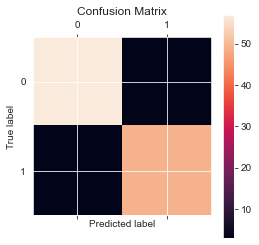

[[57  3]
 [ 3 49]]
Accuracy:  0.9464285714285714
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


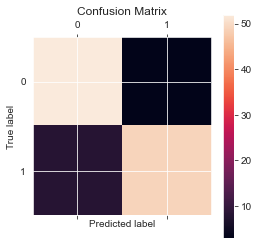

[[52  3]
 [ 8 49]]
Accuracy:  0.9017857142857143
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


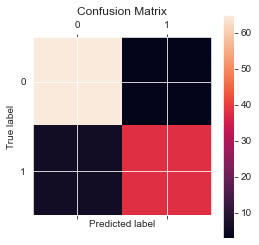

[[65  3]
 [ 6 38]]
Accuracy:  0.9196428571428571
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


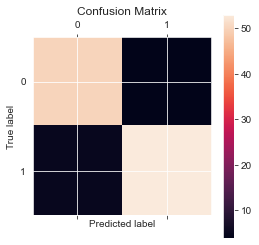

[[50  4]
 [ 5 53]]
Accuracy:  0.9196428571428571
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


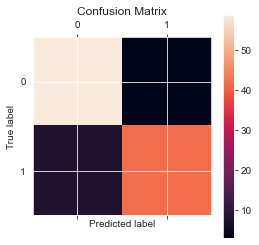

[[59  3]
 [ 8 42]]
Accuracy:  0.9017857142857143
Average Accuracy:  0.9163479772439949
Maximum Accuracy:  0.9469026548672567


In [178]:
UserA_N_KnnModel = KnnClassification_Method(3)
Nmax_acc =[]
for train_index,test_index in kf.split(negative_x,negative_y):
    negative_x_train,negative_x_test = negative_x[train_index],negative_x[test_index]
    negative_y_train,negative_y_test = negative_y[train_index],negative_y[test_index]
    UserA_N_KnnModel.fit_KnnAlgorithm(negative_x_train,negative_y_train)
    pred_negativeK_A = UserA_N_KnnModel.predict_KnnAlgorithm(negative_x_test)
    acc = accuracy_score(negative_y_test,pred_negativeK_A)
    print("Confusion Matrix")
    print(plot_CM(negative_y_test,pred_negativeK_A))
    print("Accuracy: ",acc)
    # add the accuracy to the list
    Nmax_acc.append(acc)

#print the maximum accuracy
print("Average Accuracy: ",np.mean(Nmax_acc))
print("Maximum Accuracy: ",max(Nmax_acc))



Evaluate Accuracy of User A on User B

In [179]:
# Save the user a  relative
pickle.dump(UserA_R_KnnModel,open('UserA_R_KnnModel.sav','wb'))

In [180]:
pickle.dump(UserA_N_KnnModel,open('UserA_N_KnnModel.sav','wb'))

In [181]:
# load in user b data
relative_x_b,relative_y_b = examine_expression(0,'b')
negative_x_b,negative_y_b = examine_expression(1,'b')

In [182]:
# Standardize the Data
relative_x_b = standardize(relative_x_b)
negative_x_b = standardize(negative_x_b)

C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


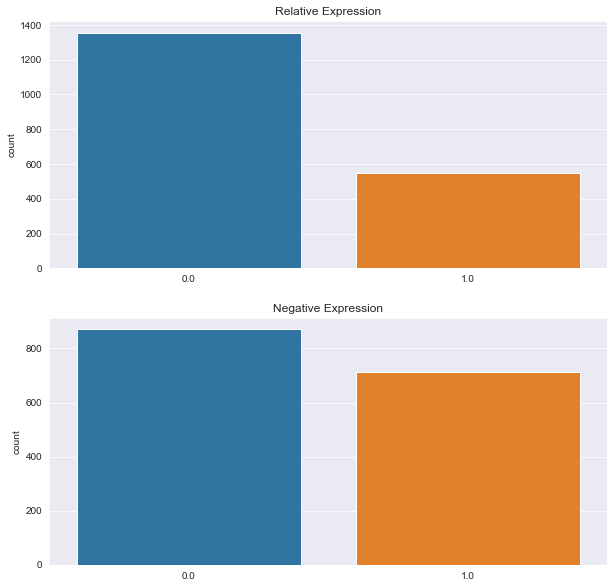

In [183]:
#Plot relative and negative labels
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(relative_y_b)
plt.title('Relative Expression')
plt.subplot(2,1,2)
sns.countplot(negative_y_b)
plt.title('Negative Expression')
plt.show()


In [184]:
UserA_R_KnnModel = pickle.load(open('UserA_R_KnnModel.sav','rb'))

In [185]:
UserA_N_KnnModel = pickle.load(open('UserA_N_KnnModel.sav','rb'))

In [186]:
for train_index,test_index in kf.split(relative_x_b,relative_y_b):
    relative_x_b_train,relative_x_b_test = relative_x_b[train_index],relative_x_b[test_index]
    relative_y_b_train,relative_y_b_test = relative_y_b[train_index],relative_y_b[test_index]


In [187]:
Relative_AonB_pred = UserA_R_KnnModel.predict_KnnAlgorithm(relative_x_b_test)

In [188]:
Relative_AonB_acc = accuracy_score(relative_y_b_test,Relative_AonB_pred)

In [189]:
for train_index,test_index in kf.split(negative_x_b,negative_y_b):
    negative_x_b_train,negative_x_b_test = negative_x_b[train_index],negative_x_b[test_index]
    negative_y_b_train,negative_y_b_test = negative_y_b[train_index],negative_y_b[test_index]

In [190]:
Negative_AonB_pred = UserA_N_KnnModel.predict_KnnAlgorithm(negative_x_b_test)

In [191]:
Negative_AonB_acc = accuracy_score(negative_y_b_test,Negative_AonB_pred)

In [192]:
print(Relative_AonB_acc)

0.7684210526315789


In [193]:
print(Negative_AonB_acc)

0.5759493670886076


Confusion Matrix for Relative Expression


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


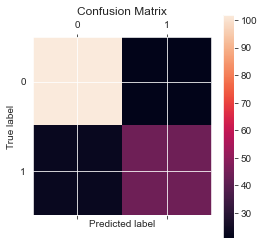

[[102  21]
 [ 23  44]]


In [194]:
# Use other performance metrics
print("Confusion Matrix for Relative Expression")
print(plot_CM(relative_y_b_test,Relative_AonB_pred))

Confusion Matrix for Negative Expression


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


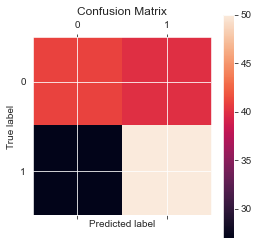

[[41 40]
 [27 50]]


In [195]:
print("Confusion Matrix for Negative Expression")
print(plot_CM(negative_y_b_test,Negative_AonB_pred))

ROC Curve for User A on User B - Relative and Negative


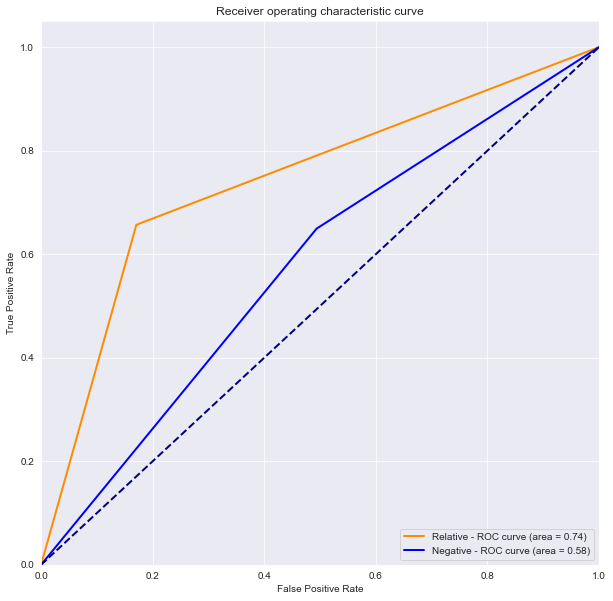

In [196]:
# Plot ROC Curve for User A on User B - Relative
def plot_rocurve(y_test,y_pred,y_test_b,y_pred_b):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # false positive rate, true positive rate for relative
    fpr_b, tpr_b, thresholds_b = roc_curve(y_test_b, y_pred_b) # false positive rate, true positive rate for negative
    roc_auc = auc(fpr, tpr)
    roc_auc_b = auc(fpr_b, tpr_b)
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='Relative - ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr_b, tpr_b, color='blue',
             lw=2, label='Negative - ROC curve (area = %0.2f)' % roc_auc_b)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()



print("ROC Curve for User A on User B - Relative and Negative")
plot_rocurve(relative_y_b_test,Relative_AonB_pred,negative_y_b_test,Negative_AonB_pred)

Precision-Recall Curve for User A on User B - Relative


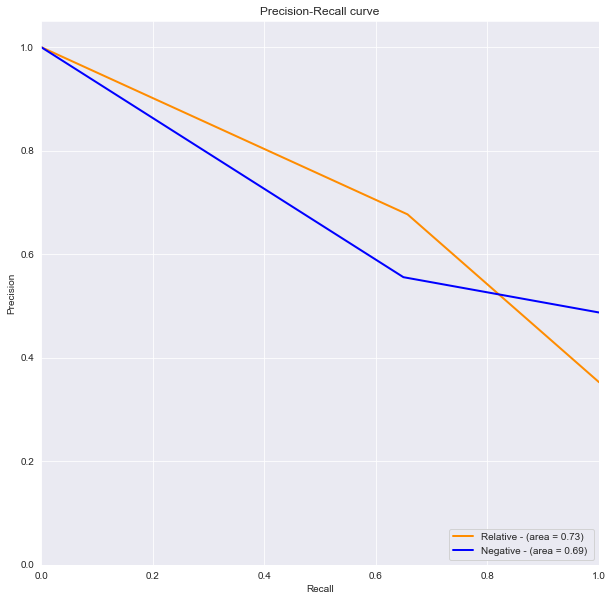

None


In [197]:
def precision_recall(ytest,ypred,ytest_b,ypred_b):
    precision, recall, thresholds = precision_recall_curve(ytest, ypred)
    precision_b, recall_b, thresholds_b = precision_recall_curve(ytest_b, ypred_b)
    auc_precision = auc(recall, precision)
    auc_precision_b = auc(recall_b, precision_b)
    plt.figure(figsize=(10,10))
    plt.plot(recall, precision, color='darkorange',
             lw=2, label='Relative - (area = %0.2f)' % auc_precision)
    plt.plot(recall_b, precision_b, color='blue',
             lw=2, label='Negative - (area = %0.2f) ' % auc_precision_b)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

print("Precision-Recall Curve for User A on User B - Relative")
print(precision_recall(relative_y_b_test,Relative_AonB_pred,negative_y_b_test,Negative_AonB_pred))

Additional Experiments on the first classification Method
Repeat the analysis (training + testing) by inverting the roles of the users
(user B and user A) and comparing the results.

In [198]:
UserB_R_KnnModel = KnnClassification_Method(3)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


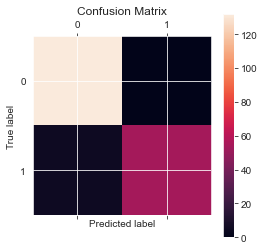

[[132   0]
 [  5  54]]
Accuracy:  0.9738219895287958
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


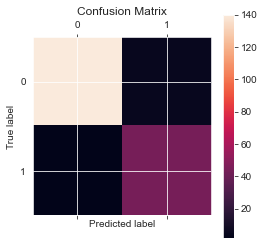

[[140   5]
 [  2  44]]
Accuracy:  0.9633507853403142
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


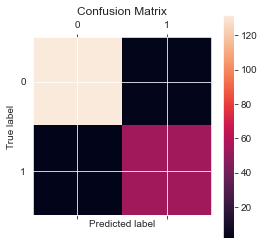

[[132   3]
 [  2  54]]
Accuracy:  0.9738219895287958
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


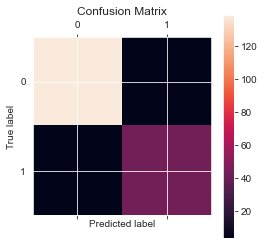

[[139   4]
 [  4  44]]
Accuracy:  0.9581151832460733
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


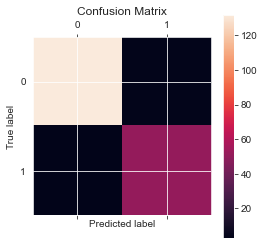

[[132   4]
 [  3  51]]
Accuracy:  0.9631578947368421
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


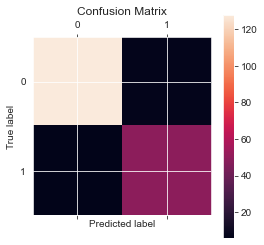

[[128   7]
 [  6  49]]
Accuracy:  0.9315789473684211
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


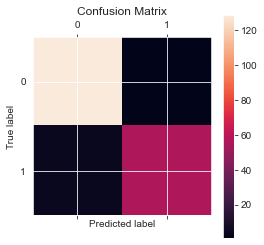

[[129   1]
 [  4  56]]
Accuracy:  0.9736842105263158
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


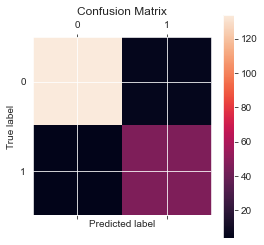

[[134   6]
 [  4  46]]
Accuracy:  0.9473684210526315
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


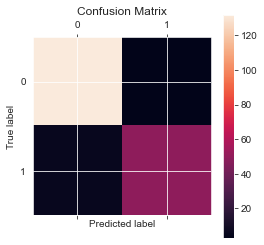

[[132   3]
 [  6  49]]
Accuracy:  0.9526315789473684
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


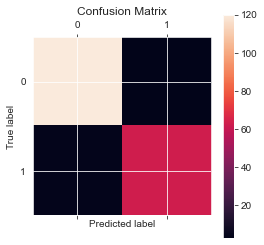

[[120   3]
 [  4  63]]
Accuracy:  0.9631578947368421
Average Accuracy:  0.96006888950124
Maximum Accuracy:  0.9738219895287958


In [199]:
 #  Perform cross validation on the user B expressions
Rmax_acc_b = []
for train_index,test_index in kf.split(relative_x_b,relative_y_b):
    relative_x_b_train,relative_x_b_test = relative_x_b[train_index],relative_x_b[test_index]
    relative_y_b_train,relative_y_b_test = relative_y_b[train_index],relative_y_b[test_index]
    UserB_R_KnnModel.fit_KnnAlgorithm(relative_x_b_train,relative_y_b_train)
    relative_x_b_pred  = UserB_R_KnnModel.predict_KnnAlgorithm(relative_x_b_test)
    relative_b_acc = accuracy_score(relative_y_b_test,relative_x_b_pred)
    print("Confusion Matrix")
    print(plot_CM(relative_y_b_test,relative_x_b_pred))
    print("Accuracy: ",relative_b_acc)
    # add the accuracy to the list
    Rmax_acc_b.append(relative_b_acc)

#print the maximum accuracy
print("Average Accuracy: ",np.mean(Rmax_acc_b))
print("Maximum Accuracy: ",max(Rmax_acc_b))




In [200]:
UserB_N_KnnModel = KnnClassification_Method(3)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


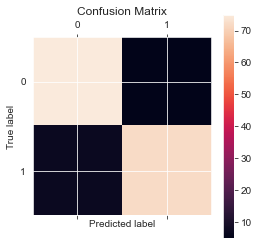

[[75  5]
 [ 7 72]]
Accuracy:  0.9245283018867925
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


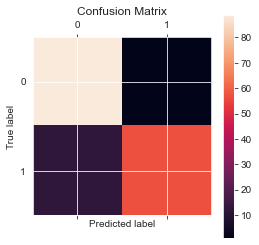

[[89  1]
 [12 57]]
Accuracy:  0.9182389937106918
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


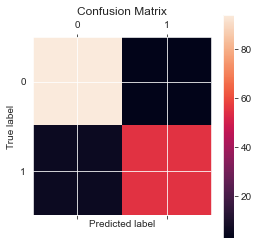

[[94  3]
 [ 6 55]]
Accuracy:  0.9430379746835443
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


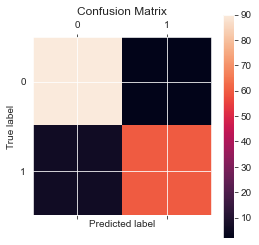

[[90  2]
 [ 6 60]]
Accuracy:  0.9493670886075949
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


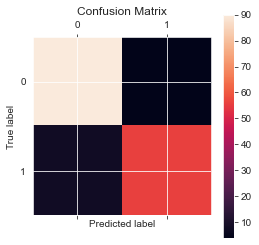

[[90  4]
 [ 8 56]]
Accuracy:  0.9240506329113924
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


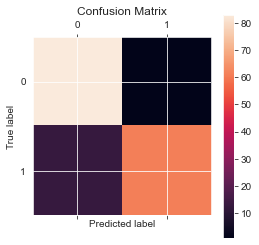

[[83  1]
 [13 61]]
Accuracy:  0.9113924050632911
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


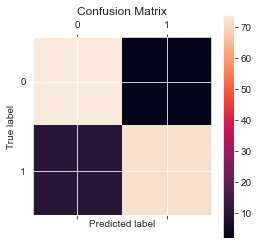

[[74  2]
 [10 72]]
Accuracy:  0.9240506329113924
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


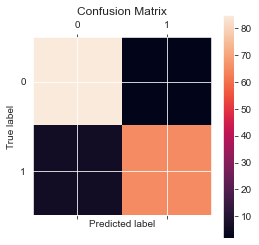

[[85  2]
 [ 6 65]]
Accuracy:  0.9493670886075949
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


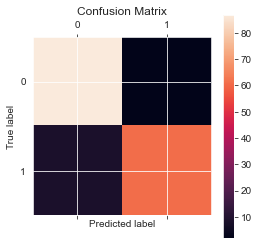

[[87  2]
 [ 8 61]]
Accuracy:  0.9367088607594937
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


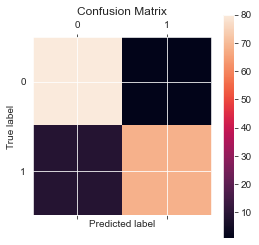

[[80  1]
 [ 9 68]]
Accuracy:  0.9367088607594937
Average Accuracy:  0.9317450839901282
Maximum Accuracy:  0.9493670886075949


In [201]:
 #  Perform cross validation on the user B expressions
Nmax_acc_b = []
for train_index,test_index in kf.split(negative_x_b , negative_y_b):
    negative_x_b_train,negative_x_b_test = negative_x_b[train_index],negative_x_b[test_index]
    negative_y_b_train,negative_y_b_test = negative_y_b[train_index],negative_y_b[test_index]
    UserB_N_KnnModel.fit_KnnAlgorithm(negative_x_b_train,negative_y_b_train)
    negative_x_b_pred  = UserB_N_KnnModel.predict_KnnAlgorithm(negative_x_b_test)
    negative_b_acc = accuracy_score(negative_y_b_test,negative_x_b_pred)
    print("Confusion Matrix")
    print(plot_CM(negative_y_b_test,negative_x_b_pred))
    print("Accuracy: ",negative_b_acc)
    # add the accuracy to the list
    Nmax_acc_b .append(negative_b_acc)


#print the maximum accuracy
print("Average Accuracy: ",np.mean(Nmax_acc_b))
print("Maximum Accuracy: ",max(Nmax_acc_b))

In [202]:
# Save the model
pickle.dump(UserB_R_KnnModel, open("UserB_R_KnnModel.sav", 'wb'))
pickle.dump(UserB_N_KnnModel, open("UserB_N_KnnModel.sav", 'wb'))

In [203]:
UserB_R_KnnModel = pickle.load(open("UserB_R_KnnModel.sav", 'rb'))
UserB_N_KnnModel = pickle.load(open("UserB_N_KnnModel.sav", 'rb'))

In [204]:
for train_index, test_index in kf.split(relative_x, relative_y):
    relative_x_train, relative_x_test = relative_x[train_index], relative_x[test_index]
    relative_y_train, relative_y_test = relative_y[train_index], relative_y[test_index]


In [205]:
#  Perform cross validation on the user A expressions
for train_index,test_index in kf.split(negative_x,negative_y):
    negative_x_train,negative_x_test = negative_x[train_index],negative_x[test_index]
    negative_y_train,negative_y_test = negative_y[train_index],negative_y[test_index]


In [206]:
Relative_BonA_pred = UserB_R_KnnModel.predict_KnnAlgorithm(relative_x_test)
Negative_BonA_pred = UserB_N_KnnModel.predict_KnnAlgorithm(negative_x_test)

In [207]:
Relative_BonA_acc = accuracy_score(relative_y_test,Relative_BonA_pred)
Negative_BonA_acc = accuracy_score(negative_y_test,Negative_BonA_pred)

In [208]:
print("Relative_BonA_acc: ",Relative_BonA_acc)
print("Negative_BonA_acc: ",Negative_BonA_acc)

Relative_BonA_acc:  0.7682403433476395
Negative_BonA_acc:  0.6607142857142857


Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


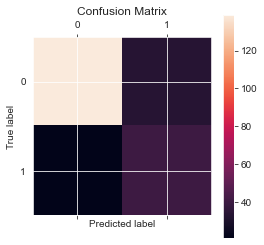

[[139  33]
 [ 21  40]]


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


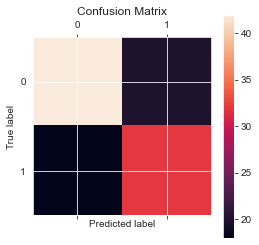

[[42 20]
 [18 32]]


In [209]:
# Confusion Matrix
print("Confusion Matrix")
print(plot_CM(relative_y_test,Relative_BonA_pred))
print(plot_CM(negative_y_test,Negative_BonA_pred))

ROC Curve


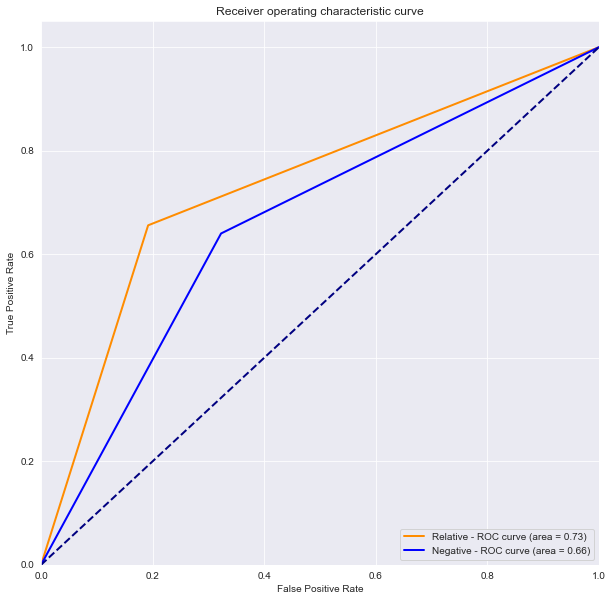

None


In [210]:
# ROCCURVE
print("ROC Curve")
print(plot_rocurve(relative_y_test,Relative_BonA_pred,negative_y_test,Negative_BonA_pred))

Precision-Recall Curve


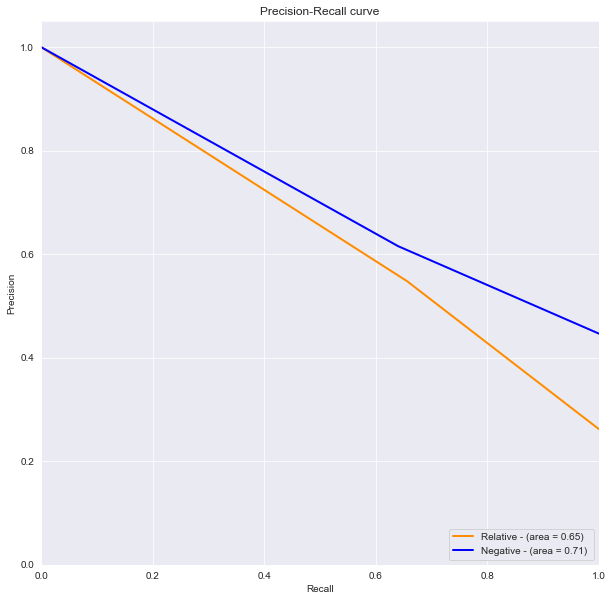

None


In [211]:
# Precision-Recall Curve
print("Precision-Recall Curve")
print(precision_recall(relative_y_test,Relative_BonA_pred,negative_y_test,Negative_BonA_pred))

Repeat the analysis (training + testing) by using a different feature representation
(eg. Using the PCA method) and comparing the results.

In [212]:
# load in user b data
new_relative_x_b,new_relative_y_b = examine_expression(0,'b')
new_negative_x_b,new_negative_y_b = examine_expression(1,'b')

In [213]:
# Standardize the data
new_relative_x_b_std = standardize(new_relative_x_b)
new_negative_x_b_std = standardize(new_negative_x_b)

In [214]:
PCAKNNModel_R = KnnClassification_Method(3)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


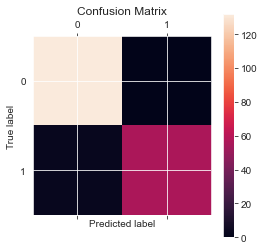

[[132   0]
 [  3  56]]
0.9842931937172775
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


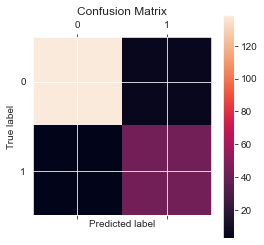

[[139   6]
 [  3  43]]
0.9528795811518325
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


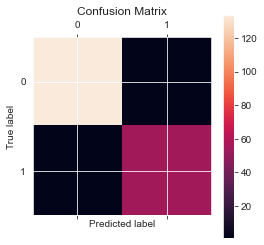

[[134   1]
 [  1  55]]
0.9895287958115183
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


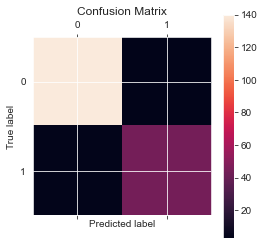

[[140   3]
 [  4  44]]
0.9633507853403142
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


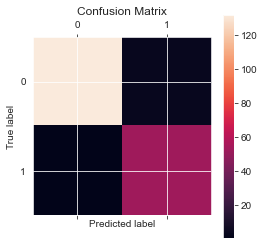

[[132   4]
 [  1  53]]
0.9736842105263158
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


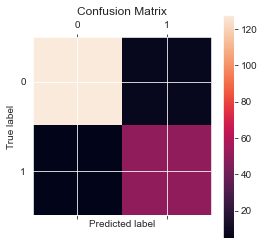

[[128   7]
 [  5  50]]
0.9368421052631579
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


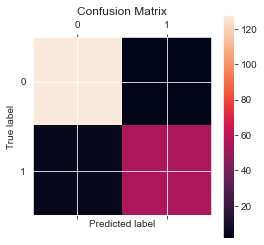

[[128   2]
 [  4  56]]
0.968421052631579
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


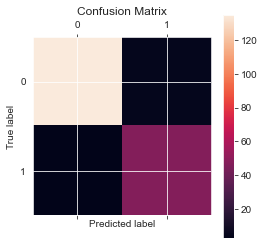

[[135   5]
 [  3  47]]
0.9578947368421052
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


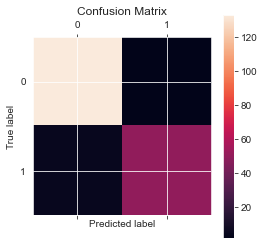

[[133   2]
 [  5  50]]
0.9631578947368421
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


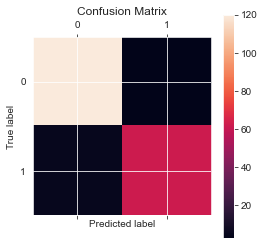

[[120   3]
 [  5  62]]
0.9578947368421052
Maximum Accuracy:  0.9895287958115183
Average Accuracy:  0.9647947092863047


In [215]:
pca_rmax = []
for train_index,test_index in kf.split(new_relative_x_b_std,new_relative_y_b):
    new_relative_x_b_std_train,new_relative_x_b_std_test = new_relative_x_b_std[train_index],new_relative_x_b_std[test_index]
    new_relative_y_b_train,new_relative_y_b_test = new_relative_y_b[train_index],new_relative_y_b[test_index]
    pca = PCA(n_components=43)
    pca.fit(new_relative_x_b_std_train)
    new_relative_x_b_std_train_pca = pca.transform(new_relative_x_b_std_train)
    new_relative_x_b_std_test_pca = pca.transform(new_relative_x_b_std_test)
    PCAKNNModel_R.fit_KnnAlgorithm(new_relative_x_b_std_train_pca,new_relative_y_b_train)
    new_relative_y_b_pred = PCAKNNModel_R.predict_KnnAlgorithm(new_relative_x_b_std_test_pca)
    new_relative_y_b_acc = accuracy_score(new_relative_y_b_test,new_relative_y_b_pred)
    print("Confusion Matrix")
    print(plot_CM(new_relative_y_b_test,new_relative_y_b_pred))
    print(new_relative_y_b_acc)
    pca_rmax.append(new_relative_y_b_acc)

print("Maximum Accuracy: ",max(pca_rmax))

print("Average Accuracy: ",np.mean(pca_rmax))

In [216]:
PCAKNNModel_N = KnnClassification_Method(1)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


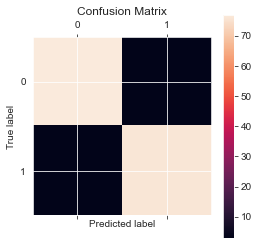

[[77  3]
 [ 3 76]]
0.9622641509433962
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


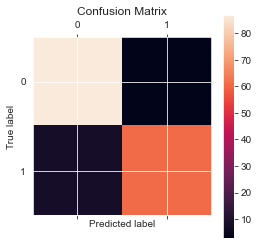

[[87  3]
 [ 8 61]]
0.9308176100628931
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


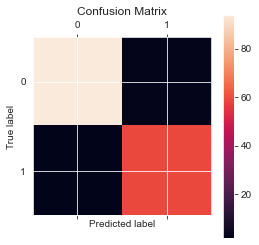

[[94  3]
 [ 2 59]]
0.9683544303797469
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


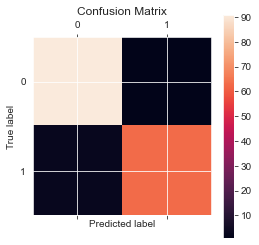

[[91  1]
 [ 3 63]]
0.9746835443037974
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


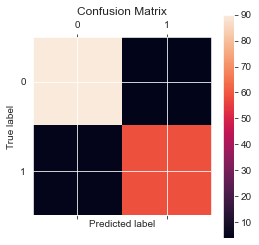

[[90  4]
 [ 5 59]]
0.9430379746835443
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


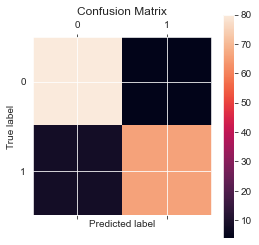

[[80  4]
 [ 8 66]]
0.9240506329113924
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


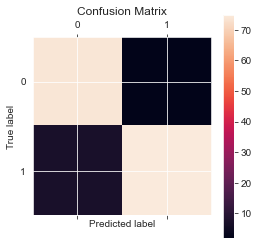

[[74  2]
 [ 7 75]]
0.9430379746835443
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


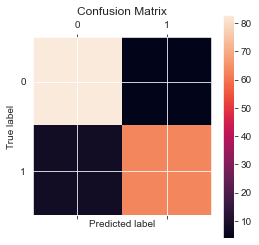

[[83  4]
 [ 8 63]]
0.9240506329113924
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


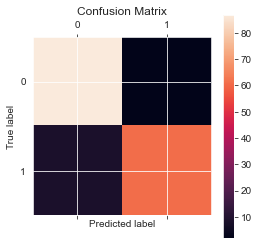

[[87  2]
 [ 8 61]]
0.9367088607594937
Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


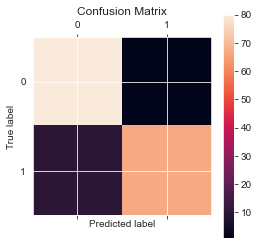

[[80  1]
 [10 67]]
0.930379746835443
Maximum Accuracy:  0.9746835443037974
Average Accuracy:  0.9437385558474645


In [217]:
pca_nmaX = []
for train_index,test_index in kf.split(new_negative_x_b_std,new_negative_y_b):
    new_negative_x_b_std_train,new_negative_x_b_std_test = new_negative_x_b_std[train_index],new_negative_x_b_std[test_index]
    new_negative_y_b_train,new_negative_y_b_test = new_negative_y_b[train_index],new_negative_y_b[test_index]
    pca = PCA(n_components=10)
    pca.fit(new_negative_x_b_std_train)
    new_negative_x_b_std_train_pca = pca.transform(new_negative_x_b_std_train)
    new_negative_x_b_std_test_pca = pca.transform(new_negative_x_b_std_test)
    PCAKNNModel_N.fit_KnnAlgorithm(new_negative_x_b_std_train_pca,new_negative_y_b_train)
    new_negative_y_b_pred = PCAKNNModel_N.predict_KnnAlgorithm(new_negative_x_b_std_test_pca)
    new_negative_y_b_acc = accuracy_score(new_negative_y_b_test,new_negative_y_b_pred)
    print("Confusion Matrix")
    print(plot_CM(new_negative_y_b_test,new_negative_y_b_pred))
    print(new_negative_y_b_acc)
    pca_nmaX.append(new_negative_y_b_acc)


print("Maximum Accuracy: ",max(pca_nmaX))
print("Average Accuracy: ",np.mean(pca_nmaX))

In [218]:
pickle.dump(PCAKNNModel_R, open("PCAKNNModel_R.sav", 'wb'))

In [219]:
PCAKNNModel_R = pickle.load(open("PCAKNNModel_R.sav", 'rb'))

In [220]:
pickle.dump(PCAKNNModel_N, open("PCAKNNModel_N.sav", 'wb'))


In [221]:
PCAKNNModel_N = pickle.load(open("PCAKNNModel_N.sav", 'rb'))

In [222]:
# load in user a data expressions
new_relative_x_a,new_relative_y_a = examine_expression(0,'a')
new_negative_x_a,new_negative_y_a = examine_expression(1,'a')

In [223]:
# Standardize the data
new_relative_x_a_std = standardize(new_relative_x_a)
new_negative_x_a_std = standardize(new_negative_x_a)

In [224]:
for train_index,test_index in kf.split(new_relative_x_a_std,new_relative_y_a):
    new_relative_x_a_std_train,new_relative_x_a_std_test = new_relative_x_a_std[train_index],new_relative_x_a_std[test_index]
    new_relative_y_a_train,new_relative_y_a_test = new_relative_y_a[train_index],new_relative_y_a[test_index]
    pca = PCA(n_components=43)
    pca.fit(new_relative_x_a_std_train)
    new_relative_x_b_std_train_pca = pca.transform(new_relative_x_a_std_train)
    new_relative_x_b_std_test_pca = pca.transform(new_relative_x_a_std_test)

In [225]:
PCA_RBA = PCAKNNModel_R.predict_KnnAlgorithm(new_relative_x_b_std_test_pca)
PCA_RBA_acc = accuracy_score(new_relative_y_a_test,PCA_RBA)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


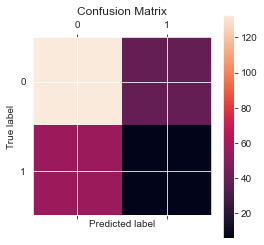

[[133  39]
 [ 55   6]]


In [226]:
print("Confusion Matrix")
print(plot_CM(new_relative_y_a_test,PCA_RBA))

In [227]:
print(PCA_RBA_acc)

0.5965665236051502


In [228]:
for train_index,test_index in kf.split(new_negative_x_a_std,new_negative_y_a):
    new_negative_x_a_std_train,new_negative_x_a_std_test = new_negative_x_a_std[train_index],new_negative_x_a_std[test_index]
    new_negative_y_a_train,new_negative_y_a_test = new_negative_y_a[train_index],new_negative_y_a[test_index]
    pca = PCA(n_components=10)
    pca.fit(new_negative_x_a_std_train)
    new_negative_x_b_std_train_pca = pca.transform(new_negative_x_a_std_train)
    new_negative_x_b_std_test_pca = pca.transform(new_negative_x_a_std_test)

In [229]:
PCA_NBA = PCAKNNModel_N.predict_KnnAlgorithm(new_negative_x_b_std_test_pca)

In [230]:
PCA_NBA_acc = accuracy_score(new_negative_y_a_test,PCA_NBA)

Confusion Matrix


C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


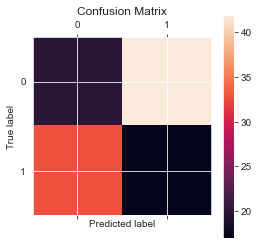

[[20 42]
 [33 17]]


In [231]:
print("Confusion Matrix")
print(plot_CM(new_negative_y_a_test,PCA_NBA))

In [232]:
print(PCA_NBA_acc)

0.33035714285714285


ROC Curve


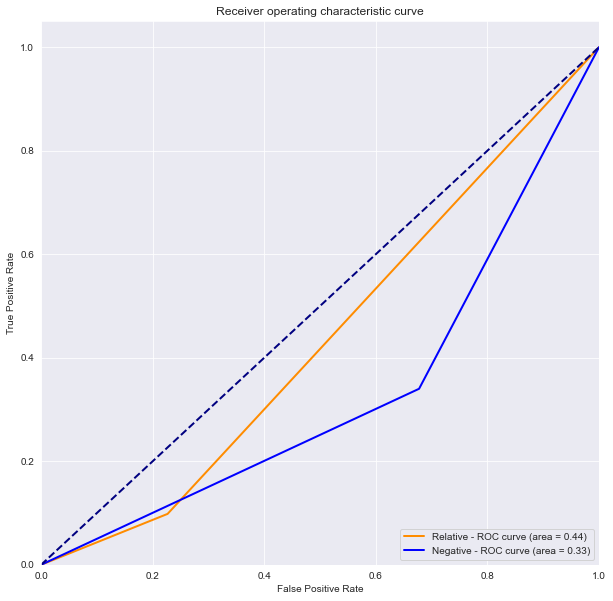

In [233]:
print("ROC Curve")
plot_rocurve(new_relative_y_a_test,PCA_RBA,new_negative_y_a_test,PCA_NBA)


Presicion-Recall Curve


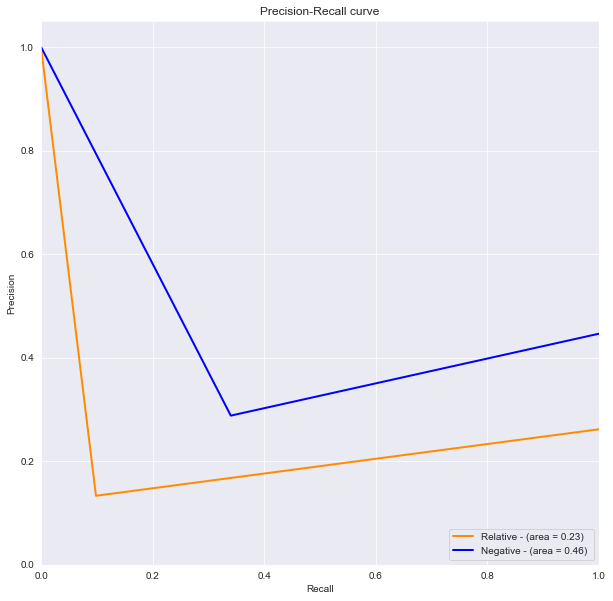

In [234]:
print("Presicion-Recall Curve")
precision_recall(new_relative_y_a_test,PCA_RBA,new_negative_y_a_test,PCA_NBA)


Choose a different classifier than before, and repeat the training and testing [30%],
broken down into:

In [235]:
cnn_relative_x_a,cnn_relative_y_a = examine_expression(0,'a')
cnn_negative_x_a,cnn_negative_y_a = examine_expression(1,'a')

In [236]:
cnn_relative_x_a_std = standardize(cnn_relative_x_a)
cnn_negative_x_a_std = standardize(cnn_negative_x_a)

C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: imshow() missing 1 required positional argument: 'X'

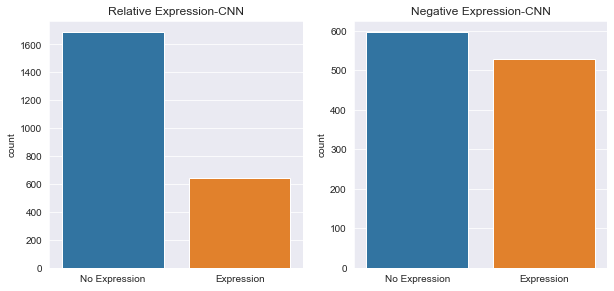

In [237]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(cnn_relative_y_a)
plt.title("Relative Expression-CNN")
set0 = "No Expression"
set1 = "Expression"
plt.xticks([0,1], [set0,set1])
plt.subplot(2,2,2)
sns.countplot(cnn_negative_y_a)
plt.title("Negative Expression-CNN")
plt.xticks([0,1], [set0,set1])
plt.imshow()

In [238]:
# Implement CNN on the data

In [239]:
from sklearn.model_selection import train_test_split

cnn_relative_x_a_std_train,cnn_relative_x_a_std_test,cnn_relative_y_a_train,cnn_relative_y_a_test = train_test_split(cnn_relative_x_a_std,cnn_relative_y_a,test_size=0.3,random_state=42)

In [240]:
cnn_negative_x_a_std_train,cnn_negative_x_a_std_test,cnn_negative_y_a_train,cnn_negative_y_a_test = train_test_split(cnn_negative_x_a_std,cnn_negative_y_a,test_size=0.3,random_state=42)

In [241]:
cnn_relative_x_a_std_train.shape

(1631, 300)

Implement CNN on the data


In [242]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D

In [243]:
class Cnn:
    def __init__(self,X_train,y_train,X_test,y_test,epochs,batch_size,learning_rate,num_classes,num_filters,filter_size,pool_size,hidden_layer_size,dropout_rate):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_classes = num_classes
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.pool_size = pool_size
        self.hidden_layer_size = hidden_layer_size
        self.dropout_rate = dropout_rate

    # Define the model architecture - Convolutional Neural Network - 1D CNN
    def build_model_1D(self):
       self.model = Sequential()
       self.model.add(Conv1D(filters=self.num_filters, kernel_size=self.filter_size, activation='relu', input_shape=(self.X_train[0].shape[0],1))) #
       self.model.add(Activation('relu'))
       self.model.add(MaxPooling1D(pool_size=self.pool_size))
       self.model.add(Dropout(self.dropout_rate))
       self.model.add(Flatten())
       self.model.add(Dense(self.hidden_layer_size))
       self.model.add(Activation('relu'))
       self.model.add(Dense(self.num_classes))
       self.model.add(Activation('softmax'))
       self.model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=self.learning_rate),metrics=['accuracy'])


    # Define the model architecture - Convolutional Neural Network - 2D CNN
    def build_model_2D(self):
       self.model = Sequential()
       self.model.add(Conv2D(filters=self.num_filters, kernel_size=self.filter_size, activation='relu', input_shape=(self.X_train.shape[1],None)))
       self.model.add(Activation('relu'))
       self.model.add(MaxPooling2D(pool_size=self.pool_size))
       self.model.add(Dropout(self.dropout_rate))
       self.model.add(Flatten())
       self.model.add(Dense(self.hidden_layer_size))
       self.model.add(Activation('relu'))
       self.model.add(Dense(self.num_classes))
       self.model.add(Activation('softmax'))
       self.model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=self.learning_rate),metrics=['accuracy'])

    # Train the model
    def train_model(self):
        self.history = self.model.fit(self.X_train,self.y_train,batch_size=self.batch_size,epochs=self.epochs,verbose=1,validation_data=(self.X_test,self.y_test))

    # Plot the history of the model
    def plot_history(self):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'],loc='upper left')
        plt.show()

    # Evaluate the model
    def evaluate_model(self):
        scores = self.model.evaluate(self.X_test,self.y_test,verbose=1)
        print('Test loss:', scores[0])
        print('Test accuracy:', scores[1])


    # Predict the model
    def predict_model(self,x_test,y_test):
        y_pred = self.model.predict(x_test)
        y_pred = np.argmax(y_pred,axis=1)
        y_test = np.argmax(y_test,axis=1)
        accuracy = accuracy_score(y_test,y_pred)
        return accuracy #return the accuracy

In [281]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Activation
from keras.utils.np_utils import to_categorical



In [282]:
cnn_relative_y_a_test_cat = to_categorical(cnn_relative_y_a_test) #
cnn_relative_y_a_train_cat = to_categorical(cnn_relative_y_a_train)
cnn_negative_y_a_test_cat = to_categorical(cnn_negative_y_a_test)
cnn_negative_y_a_train_cat = to_categorical(cnn_negative_y_a_train)

In [283]:
# CNN Model

In [284]:
Rel_cnn_model = Cnn(X_train=cnn_relative_x_a_std_train,
                y_train=cnn_relative_y_a_train_cat,
                X_test=cnn_relative_x_a_std_test,
                y_test=cnn_relative_y_a_test_cat,
                num_classes=2,
                num_filters=32,
                filter_size=3,
                pool_size=2,
                dropout_rate=0.9,
                hidden_layer_size=128,
                learning_rate=0.001,
                batch_size=32,
                epochs=100)

In [285]:
Rel_cnn_model.build_model_1D()

In [286]:
Rel_cnn_model.train_model()

Epoch 1/100
51/51 [==============================] - 1s 7ms/step - loss: 0.2651 - accuracy: 0.9062 - val_loss: 0.2032 - val_accuracy: 0.9242
Epoch 2/100
51/51 [==============================] - 0s 7ms/step - loss: 0.1962 - accuracy: 0.9356 - val_loss: 0.1855 - val_accuracy: 0.9256
Epoch 3/100
51/51 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.9319 - val_loss: 0.1868 - val_accuracy: 0.9270
Epoch 4/100
51/51 [==============================] - 0s 8ms/step - loss: 0.1798 - accuracy: 0.9362 - val_loss: 0.1768 - val_accuracy: 0.9299
Epoch 5/100
51/51 [==============================] - 0s 7ms/step - loss: 0.1675 - accuracy: 0.9381 - val_loss: 0.1723 - val_accuracy: 0.9313
Epoch 6/100
51/51 [==============================] - 0s 6ms/step - loss: 0.1655 - accuracy: 0.9399 - val_loss: 0.1638 - val_accuracy: 0.9328
Epoch 7/100
51/51 [==============================] - 0s 7ms/step - loss: 0.1544 - accuracy: 0.9375 - val_loss: 0.1734 - val_accuracy: 0.9313
Epoch 8/100
5

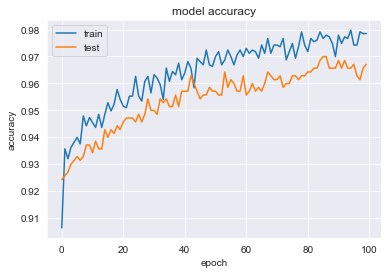

In [287]:
Rel_cnn_model.plot_history()

In [288]:
Rel_cnn_model.evaluate_model()

22/22 [==============================] - 0s 744us/step - loss: 0.1152 - accuracy: 0.9671
Test loss: 0.11517991870641708
Test accuracy: 0.9670958518981934


In [289]:
Rel_cnn_model.predict_model(cnn_relative_x_a_std_test,cnn_relative_y_a_test_cat)

0.9670958512160229

In [290]:
# Save cnn model

In [334]:
Rel_cnn_model.model.save('UserA_R_cnn_model.h5')

Test User A Relative Model on UserB

In [335]:
# Load User B expression data

In [336]:
cnn_relative_x_b,cnn_relative_y_b = examine_expression(0,'b')


In [337]:
# Standardize the data

In [338]:
cnn_relative_x_b_std = standardize(cnn_relative_x_b)

In [339]:
# Split relative and negative data

In [340]:
cnn_relative_x_b_std_train,cnn_relative_x_b_std_test,cnn_relative_y_b_train,cnn_relative_y_b_test = train_test_split(cnn_relative_x_b_std,cnn_relative_y_b,test_size=0.2,random_state=42)

In [341]:
# Convert to categorical

In [342]:
cnn_relative_y_b_train_cat = to_categorical(cnn_relative_y_b_train)
cnn_relative_y_b_test_cat = to_categorical(cnn_relative_y_b_test)

In [343]:
# USE saved model to predict User B relative expression

In [344]:
# Load model

In [345]:
from keras.models import load_model

Relative_cnnmodel = load_model('UserA_R_cnn_model.h5')

In [346]:
# Predict User B relative expression

In [347]:
# Use Relative_cnnmodel to predict User B relative expression

In [348]:
Relative_cnnmodel.predict(cnn_relative_x_b_std_test) # predict the test data

array([[1.00000000e+00, 5.60817343e-13],
       [1.00000000e+00, 8.22452281e-38],
       [7.23657943e-03, 9.92763460e-01],
       [1.00000000e+00, 0.00000000e+00],
       [9.99999881e-01, 6.13359745e-08],
       [3.14077223e-03, 9.96859193e-01],
       [8.98478627e-01, 1.01521358e-01],
       [9.24293101e-01, 7.57068917e-02],
       [1.00000000e+00, 2.47488030e-09],
       [9.89922941e-01, 1.00770257e-02],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.03286121e-11],
       [1.00000000e+00, 6.52831877e-20],
       [6.80380035e-05, 9.99931931e-01],
       [3.01503818e-02, 9.69849646e-01],
       [1.00000000e+00, 3.95881727e-09],
       [5.67952683e-03, 9.94320512e-01],
       [1.30726744e-06, 9.99998689e-01],
       [9.88202631e-01, 1.17973732e-02],
       [9.99951124e-01, 4.88958212e-05],
       [9.34811532e-01, 6.51884899e-02],
       [1.00000000e+00, 1.36261446e-17],
       [3.79008194e-03, 9.96209979e-01],
       [1.48726802e-03, 9.98512685e-01],
       [1.000000

In [349]:
Relative_cnnmodel_pred = np.argmax(Relative_cnnmodel.predict(cnn_relative_x_b_std_test),axis=1)

In [350]:
Relative_cnnmodel_acc = accuracy_score(cnn_relative_y_b_test,Relative_cnnmodel_pred)

In [351]:
Relative_cnnmodel_acc

0.8556430446194225

C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


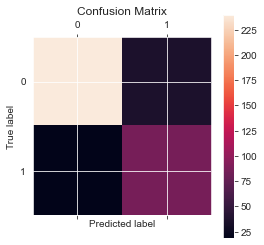

array([[240,  36],
       [ 19,  86]], dtype=int64)

In [352]:
plot_CM(cnn_relative_y_b_test,Relative_cnnmodel_pred)

In [310]:
neg_Cnnmodel = Cnn(X_train=cnn_negative_x_a_std_train,
                y_train=cnn_negative_y_a_train_cat,
                X_test=cnn_negative_x_a_std_test,
                y_test=cnn_negative_y_a_test_cat,
                num_classes=2,
                num_filters=32,
                filter_size=3,
                pool_size=2,
                dropout_rate=0.9,
                hidden_layer_size=128,
                learning_rate=0.001,
                batch_size=32,
                epochs=100)

In [311]:
neg_Cnnmodel.build_model_1D()

In [312]:
neg_Cnnmodel.train_model()

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.5354 - accuracy: 0.7354 - val_loss: 0.3547 - val_accuracy: 0.8136
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3792 - accuracy: 0.8333 - val_loss: 0.3165 - val_accuracy: 0.8254
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.3641 - accuracy: 0.8397 - val_loss: 0.2737 - val_accuracy: 0.8698
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.3008 - accuracy: 0.8728 - val_loss: 0.2726 - val_accuracy: 0.8609
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.8728 - val_loss: 0.2548 - val_accuracy: 0.8846
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.8702 - val_loss: 0.2439 - val_accuracy: 0.8876
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.8575 - val_loss: 0.2525 - val_accuracy: 0.8817
Epoch 8/100


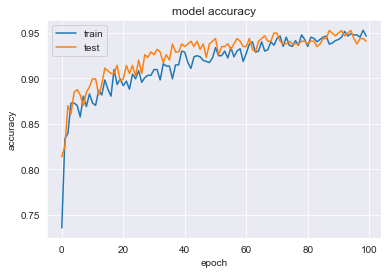

In [313]:
neg_Cnnmodel.plot_history()

In [314]:
neg_Cnnmodel.evaluate_model()

11/11 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9408
Test loss: 0.16748671233654022
Test accuracy: 0.9408283829689026


In [315]:
neg_Cnnmodel.predict_model(cnn_negative_x_a_std_test,cnn_negative_y_a_test_cat)

0.9408284023668639

In [316]:
# Save cnn model

In [317]:
neg_Cnnmodel.model.save('UserA_N_cnn_model.h5')

Test User A Negative Model on UserB

In [318]:
cnn_negative_x_b,cnn_negative_y_b = examine_expression(1,'b')

In [319]:
cnn_negative_x_b_std = standardize(cnn_negative_x_b)

In [320]:
cnn_negative_x_b_std_train,cnn_negative_x_b_std_test,cnn_negative_y_b_train,cnn_negative_y_b_test = train_test_split(cnn_negative_x_b_std,cnn_negative_y_b,test_size=0.2,random_state=42)

In [321]:
cnn_negative_y_b_train_cat = to_categorical(cnn_negative_y_b_train)
cnn_negative_y_b_test_cat = to_categorical(cnn_negative_y_b_test)

In [322]:
# USE saved model to predict User B negative expression

In [323]:
# Load model

In [324]:
Negative_cnnmodel = load_model('UserA_N_cnn_model.h5')

In [325]:
# Predict User B negative expression

In [326]:
# Use Negative_cnnmodel to predict User B negative expression

In [327]:
Negative_cnnmodel.predict(cnn_negative_x_b_std_test) # predict the test data

array([[8.15465860e-03, 9.91845310e-01],
       [5.90233697e-07, 9.99999404e-01],
       [2.10392594e-01, 7.89607465e-01],
       [6.91835701e-01, 3.08164328e-01],
       [2.04587588e-03, 9.97954130e-01],
       [2.06469093e-02, 9.79353130e-01],
       [3.29140723e-01, 6.70859277e-01],
       [1.88599847e-06, 9.99998093e-01],
       [9.99983907e-01, 1.60778254e-05],
       [5.63002713e-02, 9.43699718e-01],
       [1.00000000e+00, 1.79552895e-09],
       [2.40608696e-02, 9.75939155e-01],
       [5.09986520e-01, 4.90013421e-01],
       [1.50185024e-05, 9.99984980e-01],
       [4.52971231e-04, 9.99546945e-01],
       [1.00000000e+00, 1.43199841e-09],
       [4.86368775e-01, 5.13631165e-01],
       [1.28981769e-01, 8.71018291e-01],
       [1.83786044e-03, 9.98162210e-01],
       [1.12530834e-03, 9.98874724e-01],
       [2.56429687e-02, 9.74357009e-01],
       [1.45525970e-02, 9.85447407e-01],
       [9.89163280e-01, 1.08367885e-02],
       [1.00000000e+00, 2.93612742e-22],
       [2.411379

In [328]:
Negative_cnnmodel_pred = np.argmax(Negative_cnnmodel.predict(cnn_negative_x_b_std_test),axis=1)


In [329]:
Negative_cnnmodel_acc = accuracy_score(cnn_negative_y_b_test,Negative_cnnmodel_pred)

In [330]:
Negative_cnnmodel_acc

0.501577287066246

C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


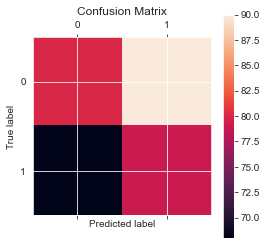

array([[80, 90],
       [68, 79]], dtype=int64)

In [331]:
plot_CM(cnn_negative_y_b_test,Negative_cnnmodel_pred)

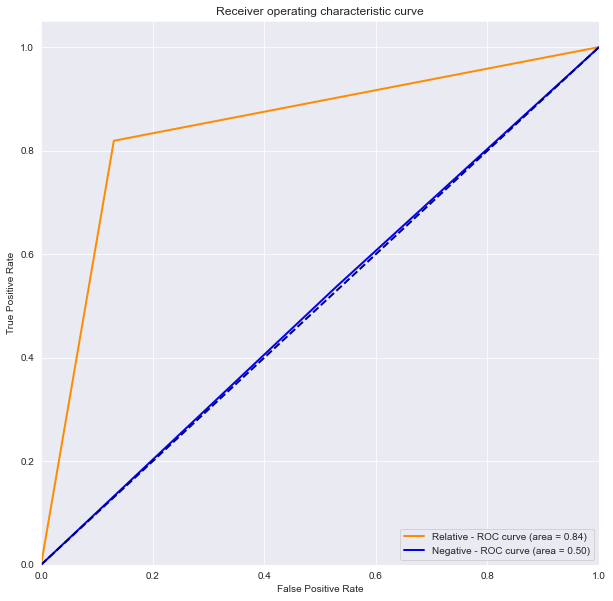

In [332]:
plot_rocurve(cnn_relative_y_b_test,Relative_cnnmodel_pred,cnn_negative_y_b_test,Negative_cnnmodel_pred)

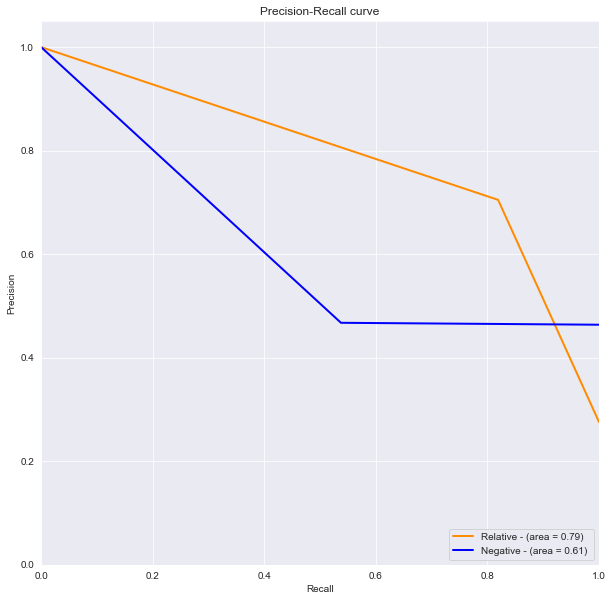

In [333]:
precision_recall(cnn_relative_y_b_test,Relative_cnnmodel_pred,cnn_negative_y_b_test,Negative_cnnmodel_pred)

Repeat the analysis (training + testing) by inverting the roles of the user (i.e., training
on user B and testing on user A), and comment on the results [3%];

In [353]:
UserB_R_CnnModel= Cnn(X_train=cnn_relative_x_b_std_train,
                y_train=cnn_relative_y_b_train_cat,
                X_test=cnn_relative_x_b_std_test,
                y_test=cnn_relative_y_b_test_cat,
                num_classes=2,
                num_filters=32,
                filter_size=3,
                pool_size=2,
                dropout_rate=0.9,
                hidden_layer_size=128,
                learning_rate=0.001,
                batch_size=32,
                epochs=100)

In [354]:
UserB_R_CnnModel.build_model_1D()

In [355]:
UserB_R_CnnModel.train_model()

Epoch 1/100
48/48 [==============================] - 1s 9ms/step - loss: 0.4693 - accuracy: 0.7984 - val_loss: 0.3239 - val_accuracy: 0.8793
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3430 - accuracy: 0.8595 - val_loss: 0.2552 - val_accuracy: 0.9029
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3142 - accuracy: 0.8667 - val_loss: 0.2221 - val_accuracy: 0.9186
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.8713 - val_loss: 0.2165 - val_accuracy: 0.9239
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.2676 - accuracy: 0.8917 - val_loss: 0.2004 - val_accuracy: 0.9344
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.2567 - accuracy: 0.8871 - val_loss: 0.1903 - val_accuracy: 0.9291
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.8871 - val_loss: 0.1807 - val_accuracy: 0.9344
Epoch 8/100
4

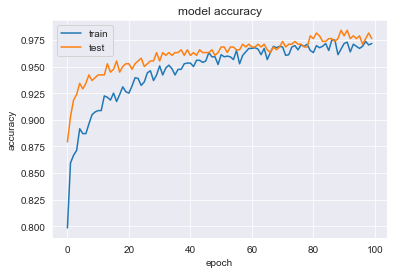

In [356]:
UserB_R_CnnModel.plot_history()

In [357]:
UserB_R_CnnModel.evaluate_model()

12/12 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9764
Test loss: 0.06340913474559784
Test accuracy: 0.9763779640197754


In [358]:
UserB_R_CnnModel.predict_model(cnn_relative_x_b_std_test,cnn_relative_y_b_test_cat)

0.9763779527559056

In [359]:
# Save cnn model

In [360]:
UserB_R_CnnModel.model.save('UserB_R_cnn_model.h5')

In [361]:
# Load model

In [362]:
UserB_R_cnnmodel = load_model('UserB_R_cnn_model.h5')

In [363]:
# Predict User B negative expression on User A data

In [364]:
UserB_R_cnnmodel.predict(cnn_relative_x_a_std_test) # predict the test data

array([[7.4453503e-01, 2.5546494e-01],
       [9.9987233e-01, 1.2763022e-04],
       [1.0000000e+00, 9.3810018e-13],
       ...,
       [7.1240830e-01, 2.8759170e-01],
       [7.6507717e-02, 9.2349231e-01],
       [9.9997807e-01, 2.1897891e-05]], dtype=float32)

In [365]:
UserB_R_cnnmodel_pred = np.argmax(UserB_R_cnnmodel.predict(cnn_relative_x_a_std_test),axis=1)

In [366]:
UserB_R_cnnmodel_acc = accuracy_score(cnn_relative_y_a_test,UserB_R_cnnmodel_pred)

In [367]:
UserB_R_cnnmodel_acc

0.8741058655221745

C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


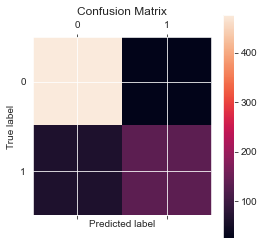

array([[477,  26],
       [ 62, 134]], dtype=int64)

In [368]:
plot_CM(cnn_relative_y_a_test,UserB_R_cnnmodel_pred)

Apply Cnn to User B Negative Expression

In [369]:
UserB_N_Cnnmodel = Cnn(X_train=cnn_negative_x_b_std_train,
                y_train=cnn_negative_y_b_train_cat,
                X_test=cnn_negative_x_b_std_test,
                y_test=cnn_negative_y_b_test_cat,
                num_classes=2,
                num_filters=32,
                filter_size=3,
                pool_size=2,
                dropout_rate=0.9,
                hidden_layer_size=128,
                learning_rate=0.001,
                batch_size=32,
                epochs=100)

In [370]:
UserB_N_Cnnmodel.build_model_1D()

In [371]:
UserB_N_Cnnmodel.train_model()

Epoch 1/100
40/40 [==============================] - 3s 10ms/step - loss: 0.5604 - accuracy: 0.7312 - val_loss: 0.4742 - val_accuracy: 0.7823
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.8040 - val_loss: 0.4114 - val_accuracy: 0.7950
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4324 - accuracy: 0.7992 - val_loss: 0.4218 - val_accuracy: 0.8423
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4005 - accuracy: 0.8253 - val_loss: 0.3686 - val_accuracy: 0.8549
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3913 - accuracy: 0.8285 - val_loss: 0.3492 - val_accuracy: 0.8644
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3772 - accuracy: 0.8443 - val_loss: 0.3750 - val_accuracy: 0.8644
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3620 - accuracy: 0.8364 - val_loss: 0.3365 - val_accuracy: 0.8580
Epoch 8/100


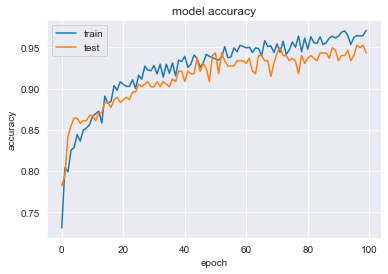

In [372]:
UserB_N_Cnnmodel.plot_history()

In [373]:
UserB_N_Cnnmodel.evaluate_model()

10/10 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9432
Test loss: 0.17419813573360443
Test accuracy: 0.9432176947593689


In [374]:
UserB_N_Cnnmodel.predict_model(cnn_negative_x_b_std_test,cnn_negative_y_b_test_cat)

0.943217665615142

In [375]:
# Save cnn model

In [376]:
UserB_N_Cnnmodel.model.save('UserB_N_cnn_model.h5')

In [377]:
# Load model

In [378]:
UserB_N_cnnmodel = load_model('UserB_N_cnn_model.h5')

In [379]:
# Predict User B negative expression on User A data

In [380]:
UserB_N_cnnmodel.predict(cnn_negative_x_a_std_test) # predict the test data

array([[1.90840694e-07, 9.99999762e-01],
       [7.87757456e-01, 2.12242499e-01],
       [8.36052060e-01, 1.63947880e-01],
       [7.89211750e-01, 2.10788280e-01],
       [9.51294601e-01, 4.87053730e-02],
       [1.64545447e-04, 9.99835372e-01],
       [5.04775643e-01, 4.95224357e-01],
       [9.68544662e-01, 3.14552933e-02],
       [1.61885037e-11, 1.00000000e+00],
       [5.56103624e-02, 9.44389641e-01],
       [9.77550268e-01, 2.24497374e-02],
       [3.07516027e-02, 9.69248354e-01],
       [9.21733677e-01, 7.82662705e-02],
       [1.76884816e-06, 9.99998212e-01],
       [1.46286562e-02, 9.85371351e-01],
       [7.67142057e-01, 2.32857898e-01],
       [1.07513284e-02, 9.89248633e-01],
       [9.96911665e-04, 9.99003112e-01],
       [9.41617727e-01, 5.83822951e-02],
       [9.97099519e-01, 2.90052709e-03],
       [4.52949166e-01, 5.47050774e-01],
       [4.98623967e-01, 5.01375973e-01],
       [2.63785958e-01, 7.36214042e-01],
       [3.69046599e-01, 6.30953372e-01],
       [3.807960

In [381]:
UserB_N_cnnmodel_pred = np.argmax(UserB_N_cnnmodel.predict(cnn_negative_x_a_std_test),axis=1)

In [382]:
UserB_N_cnnmodel_acc = accuracy_score(cnn_negative_y_a_test,UserB_N_cnnmodel_pred)

In [383]:
UserB_N_cnnmodel_acc

0.6301775147928994

C:\Users\dtibo\AppData\Local\Temp\ipykernel_23380\3195282080.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


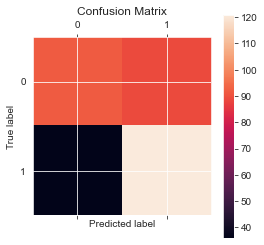

array([[ 92,  89],
       [ 36, 121]], dtype=int64)

In [384]:
plot_CM(cnn_negative_y_a_test,UserB_N_cnnmodel_pred)

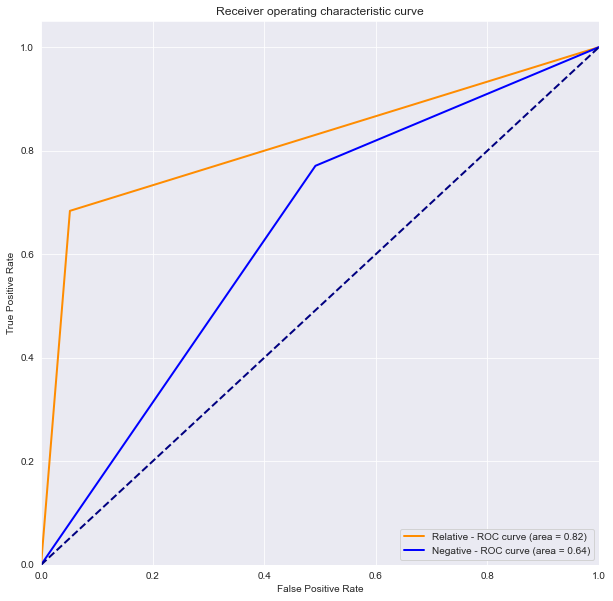

In [385]:
plot_rocurve(cnn_relative_y_a_test,UserB_R_cnnmodel_pred,cnn_negative_y_a_test,UserB_N_cnnmodel_pred)

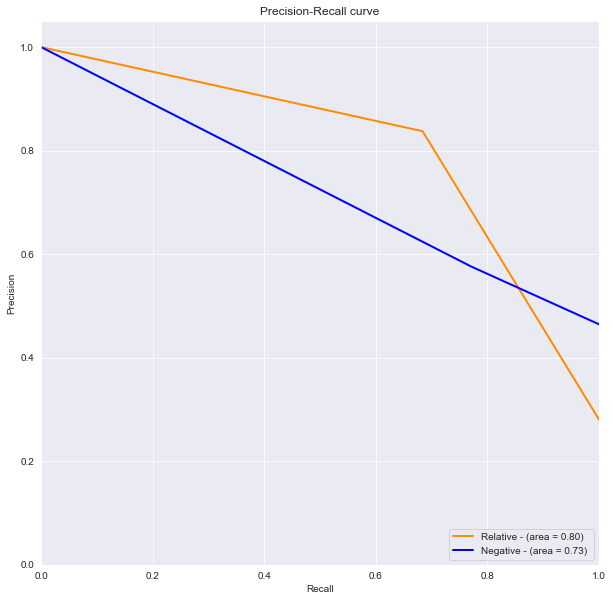

In [386]:
precision_recall(cnn_relative_y_a_test,UserB_R_cnnmodel_pred,cnn_negative_y_a_test,UserB_N_cnnmodel_pred)